In [438]:
import numpy, os
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.layers import Input, Dense, Conv2D, UpSampling2D, Conv2DTranspose, Flatten, MaxPooling2D, BatchNormalization, Dropout
from helpers import loadData

In [2]:
X,y = loadData('train')
print(X[0].shape)

(32, 32, 3)


(32, 32, 1)
(63000, 1)
[0]


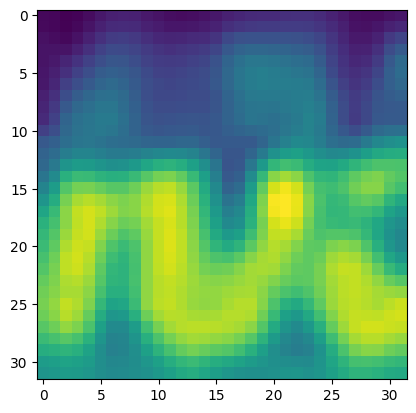

In [311]:
n = len(X)
color0 = []
color1 = []
color2 = []
col = []
for c, img in enumerate(X):
    col.append(img)
    im = numpy.array(img[:,:,0])
    color0.append(im.reshape(32,32,1))
    #color0.append(img[:,:,0])
    im = numpy.array(img[:,:,1])
    #color1.append(im.reshape(32,32,1))
    color1.append(img[:,:,1])
    im = numpy.array(img[:,:,2])
    #color2.append(im.reshape(32,32,1))
    color2.append(img[:,:,2])
#y = y.reshape(n, -1)
ytr = y[:63000]
yva = y[63000:]
color0tr = numpy.array(color0[:63000])
color0va = numpy.array(color0[63000:])
color1tr = numpy.array(color1[:63000])
color1va = numpy.array(color1[63000:])
color2tr = numpy.array(color2[:63000])
color2va = numpy.array(color2[63000:])
coltr = numpy.array(col[:63000])
colva = numpy.array(col[63000:])
print(color0[0].shape)
print(ytr.shape)
plt.imshow(color2va[2])
print(yva[2])

In [446]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=16, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.35)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same' )(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 48, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod0 = Model(inp, x)
mod0.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod0.summary()

Model: "model_166"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_168 (InputLayer)      [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_558 (Conv2D)         (None, 32, 32, 16)        272       
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_511 (MaxPooli  (None, 16, 16, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_559 (Conv2D)         (None, 16, 16, 32)        46

In [450]:
mod0.fit(color0tr, ytr, epochs=5, batch_size=512, shuffle=True, validation_data=(color0va, yva))

Epoch 1/5
62/62 [==============================] - 10s 159ms/step - loss: 0.1765 - accuracy: 0.9591 - val_loss: 0.3558 - val_accuracy: 0.9022
Epoch 2/5
62/62 [==============================] - 10s 160ms/step - loss: 0.1732 - accuracy: 0.9602 - val_loss: 0.3530 - val_accuracy: 0.9058
Epoch 3/5
62/62 [==============================] - 10s 162ms/step - loss: 0.1706 - accuracy: 0.9611 - val_loss: 0.3600 - val_accuracy: 0.9026
Epoch 4/5
62/62 [==============================] - 10s 162ms/step - loss: 0.1685 - accuracy: 0.9611 - val_loss: 0.3609 - val_accuracy: 0.9011
Epoch 5/5
62/62 [==============================] - 10s 162ms/step - loss: 0.1675 - accuracy: 0.9612 - val_loss: 0.3576 - val_accuracy: 0.9044


In [442]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=16, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.5)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same' )(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 48, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod1 = Model(inp, x)
mod1.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy', )
mod1.summary()

Model: "model_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_167 (InputLayer)      [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_554 (Conv2D)         (None, 32, 32, 16)        272       
                                                                 
 batch_normalization_38 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_507 (MaxPooli  (None, 16, 16, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_555 (Conv2D)         (None, 16, 16, 32)        46

In [445]:
mod1.fit(color1tr, ytr, epochs=13, batch_size=1024, shuffle=True, validation_data=(color1va, yva))

Epoch 1/13
62/62 [==============================] - 10s 166ms/step - loss: 0.2161 - accuracy: 0.9441 - val_loss: 0.3424 - val_accuracy: 0.9063
Epoch 2/13
62/62 [==============================] - 10s 167ms/step - loss: 0.2072 - accuracy: 0.9479 - val_loss: 0.3432 - val_accuracy: 0.9105
Epoch 3/13
62/62 [==============================] - 10s 165ms/step - loss: 0.2037 - accuracy: 0.9493 - val_loss: 0.3435 - val_accuracy: 0.9090
Epoch 4/13
62/62 [==============================] - 10s 166ms/step - loss: 0.2007 - accuracy: 0.9495 - val_loss: 0.3370 - val_accuracy: 0.9078
Epoch 5/13
62/62 [==============================] - 10s 168ms/step - loss: 0.1998 - accuracy: 0.9512 - val_loss: 0.3379 - val_accuracy: 0.9088
Epoch 6/13
62/62 [==============================] - 10s 167ms/step - loss: 0.1974 - accuracy: 0.9507 - val_loss: 0.3476 - val_accuracy: 0.9042
Epoch 7/13
62/62 [==============================] - 10s 167ms/step - loss: 0.1968 - accuracy: 0.9510 - val_loss: 0.3410 - val_accuracy: 0.9066

1/1 [==============================] - 0s 35ms/step
[[0.05319478 0.05366424 0.05880267 0.12469784 0.0047412  0.13013753
  0.1112533  0.34895012 0.07895081 0.03560752]
 [0.04705956 0.06312692 0.30116487 0.11481271 0.13993277 0.03197859
  0.12784082 0.01537053 0.11368069 0.04503252]
 [0.00672858 0.00720899 0.2301947  0.18993726 0.1616593  0.13358356
  0.0605554  0.00191609 0.07800082 0.13021536]
 [0.00862086 0.0017248  0.06568209 0.24393085 0.01442306 0.3650047
  0.06938033 0.01972611 0.08534376 0.1261634 ]
 [0.02056524 0.00454165 0.24846153 0.16814639 0.0298093  0.11893893
  0.13045195 0.02028242 0.16955931 0.08924319]]


In [459]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=16, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.45)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same' )(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 48, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod2 = Model(inp, x)
mod2.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod2.summary()

Model: "model_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_172 (InputLayer)      [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_574 (Conv2D)         (None, 32, 32, 16)        272       
                                                                 
 batch_normalization_58 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_527 (MaxPooli  (None, 16, 16, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_575 (Conv2D)         (None, 16, 16, 32)        46

In [465]:
mod2.fit(color2tr, ytr, epochs=4, batch_size=1024, shuffle=True, validation_data=(color2va, yva))

Epoch 1/4
62/62 [==============================] - 10s 163ms/step - loss: 0.2210 - accuracy: 0.9433 - val_loss: 0.3596 - val_accuracy: 0.9016
Epoch 2/4
62/62 [==============================] - 10s 163ms/step - loss: 0.2190 - accuracy: 0.9434 - val_loss: 0.3618 - val_accuracy: 0.9007
Epoch 3/4
12/62 [====>.........................] - ETA: 7s - loss: 0.2061 - accuracy: 0.9495

KeyboardInterrupt: 

In [192]:
def combine(col0,col1,col2):
    ret = []
    for c0,c1,c2 in zip(col0,col1,col2):
        t = []
        t.append((max(c0), numpy.argmax(c0)))
        t.append((max(c1), numpy.argmax(c1)))
        t.append((max(c2), numpy.argmax(c2)))
        t.sort(key=lambda x:-x[0])
        ret.append(t[0][1])
    return ret

In [466]:
col0pred = mod0.predict(color0va)
col1pred = mod1.predict(color1va)
col2pred = mod2.predict(color2va)
predictions = combine(col0pred, col1pred, col2pred)

321/321 [==============================] - 1s 3ms/step


In [304]:
def calculateAccuracy(pred, lab):
    if len(pred)!=len(lab):
        print(f"Wrong dimentions: {len(pred)}!={len(lab)}")
        return
    else:
        n = len(pred)
        sm = sum([1 if pred[i]==lab[i] else 0 for i in range(n) ])
        return sm/n


results:

In [467]:
#accuracy score
#calculated by choosing max probability
print(f"accuracy: {calculateAccuracy(predictions, yva)}")

accuracy: 0.9265867212635274
